# Welcome to the Kotlin Notebook!

## Basics

Let's start with something simple: execute a cell with a simple arithmetics and immediately see the result.

In [1]:
2 + 2

4

Execution results could be saved in variables and reused

In [2]:
val result = 3 * 14

In [3]:
result

42

In [4]:
(Out[3] as Int) / 2

21

Variables defined in the notebook can lose their nullability if they are not actually nulls

In [5]:
val a1: Int = 1
val a2: Int? = 2
val a3: Int? = null

In [6]:
a1 + a2 // OK, a2 was converted to Int

3

In [7]:
a1 + a3 // compile-time error

Line_9.jupyter.kts (1:6 - 8) Type mismatch: inferred type is Int? but Int was expected

## Rich outputs

Outputs might be not only plain text. They could also be images and HTML. HTML can contain CSS and JavaScript.

In [8]:
HTML("""
    <p>Counter: <span id="ctr">0</span> <button onclick="inc()">Increment</button></p>
    <script>
      function inc() {
        let counter = document.getElementById("ctr")
        counter.innerHTML = parseInt(counter.innerHTML) + 1;
      }
    </script>
""")

Counter: 0 Increment

**NB!** If your outputs contain JS, notebook should be marked as trusted.

![trusted-notebook](screenshots/screenshot3.png)

Images could be loaded by link. In this case, it won't show if the link breaks or if you lose Internet connection

In [9]:
%use lib-ext(0.11.0-398)

In [10]:
Image("https://kotlinlang.org/docs/images/kotlin-logo.png", embed = false).withWidth(300)

You can also embed images. In this case they will stay in the notebook forever


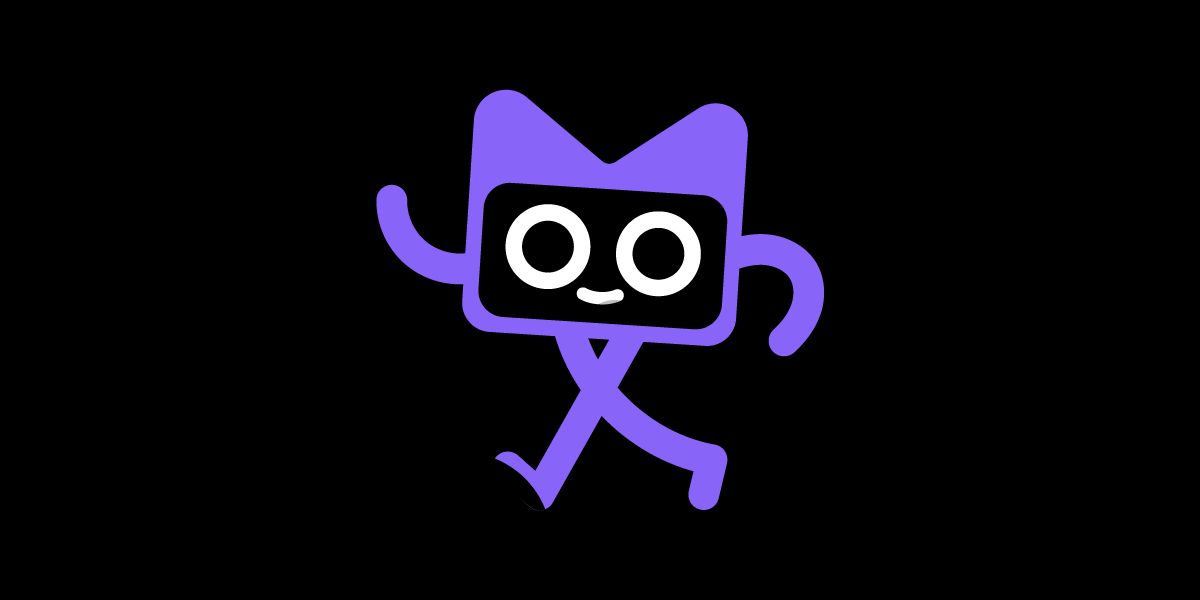

In [11]:
val kotlinMascot = Image("https://blog.jetbrains.com/wp-content/uploads/2023/04/DSGN-16174-Blog-post-banner-and-promo-materials-for-post-about-Kotlin-mascot_3.png", embed = true).withWidth(400)
kotlinMascot

The cell can also have several outputs, to achieve it use `DISPLAY()` function

Kodee is back!


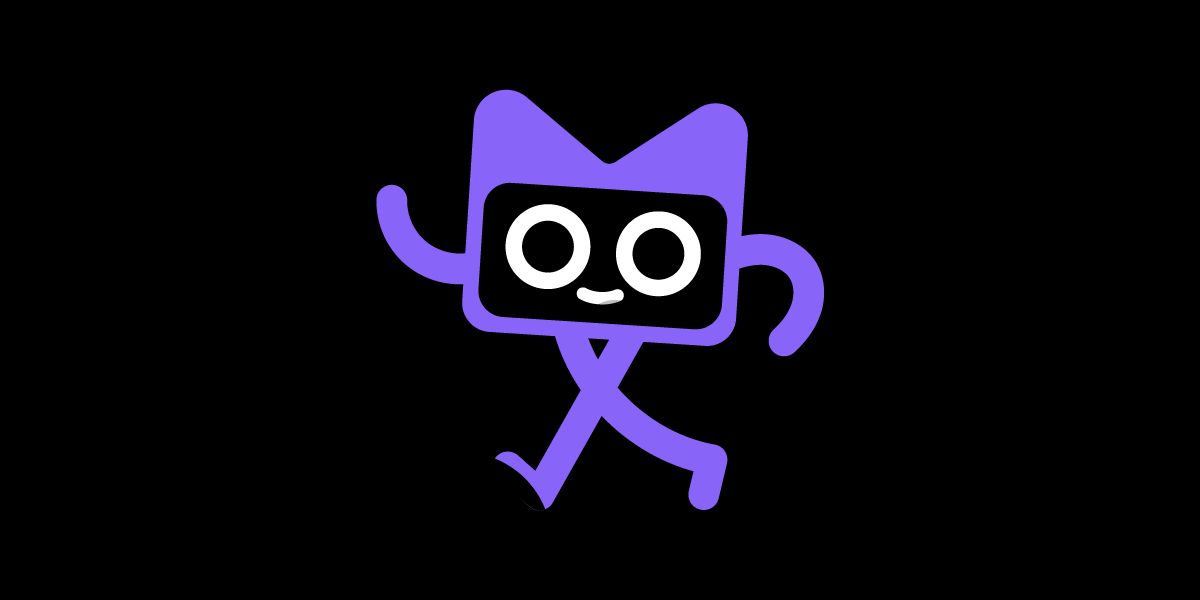

In [12]:
DISPLAY(HTML("<h2>Kodee is back!</h2>"))
DISPLAY(kotlinMascot)

With Kotlin Notebook, you can also render LaTeX formulae


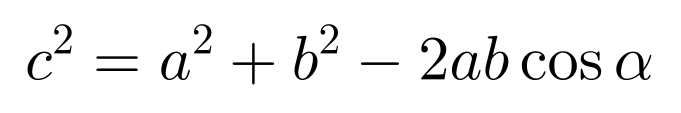

In [13]:
LATEX("c^2 = a^2 + b^2 - 2 a b \\cos\\alpha")

You can also output BufferedImage's. They are embedded into notebook

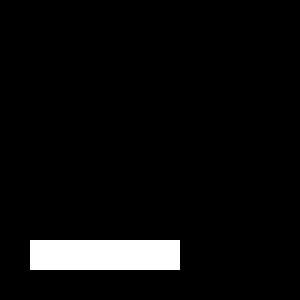

In [14]:
import java.awt.Color
import java.awt.image.BufferedImage

val width = 300
val height = width

val image = BufferedImage(width, height, BufferedImage.TYPE_INT_ARGB)

val graphics = image.createGraphics()
graphics.background = Color.BLACK
graphics.clearRect(0, 0, width, height)
graphics.setRenderingHint(
    java.awt.RenderingHints.KEY_ANTIALIASING,
    java.awt.RenderingHints.VALUE_ANTIALIAS_ON
)
graphics.color = Color.WHITE
graphics.fillRect(width / 10, height * 8 / 10, width * 10 / 20, height / 10)
graphics.dispose()

image

Generally, you can display any output using `mimeResult` function.
We're using [Jupyter approach](https://docs.jupyter.org/en/latest/reference/mimetype.html) for outputs.

In [15]:
mimeResult(
    MimeTypes.PLAIN_TEXT to "JetBrains logo",
    MimeTypes.HTML to "<b>JetBrains</b> logo"
)

JetBrains logo

## Using libraries and dependencies

You can always turn on source and binary dependencies of a current project.
To do it, use the corresponding button in the toolbar.

In [16]:
import java.io.File
import javax.imageio.ImageIO

fun showScreenshot(id: Any) {
    DISPLAY(ImageIO.read(File("screenshots/screenshot$id.png")))
}

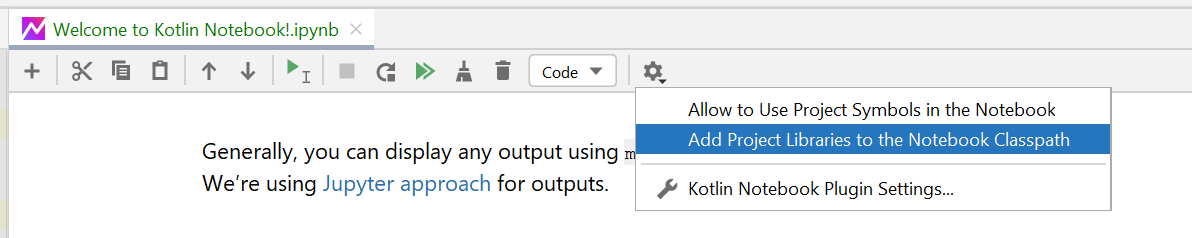

In [17]:
showScreenshot(1)

It is also possible to set these options for the newly created notebooks

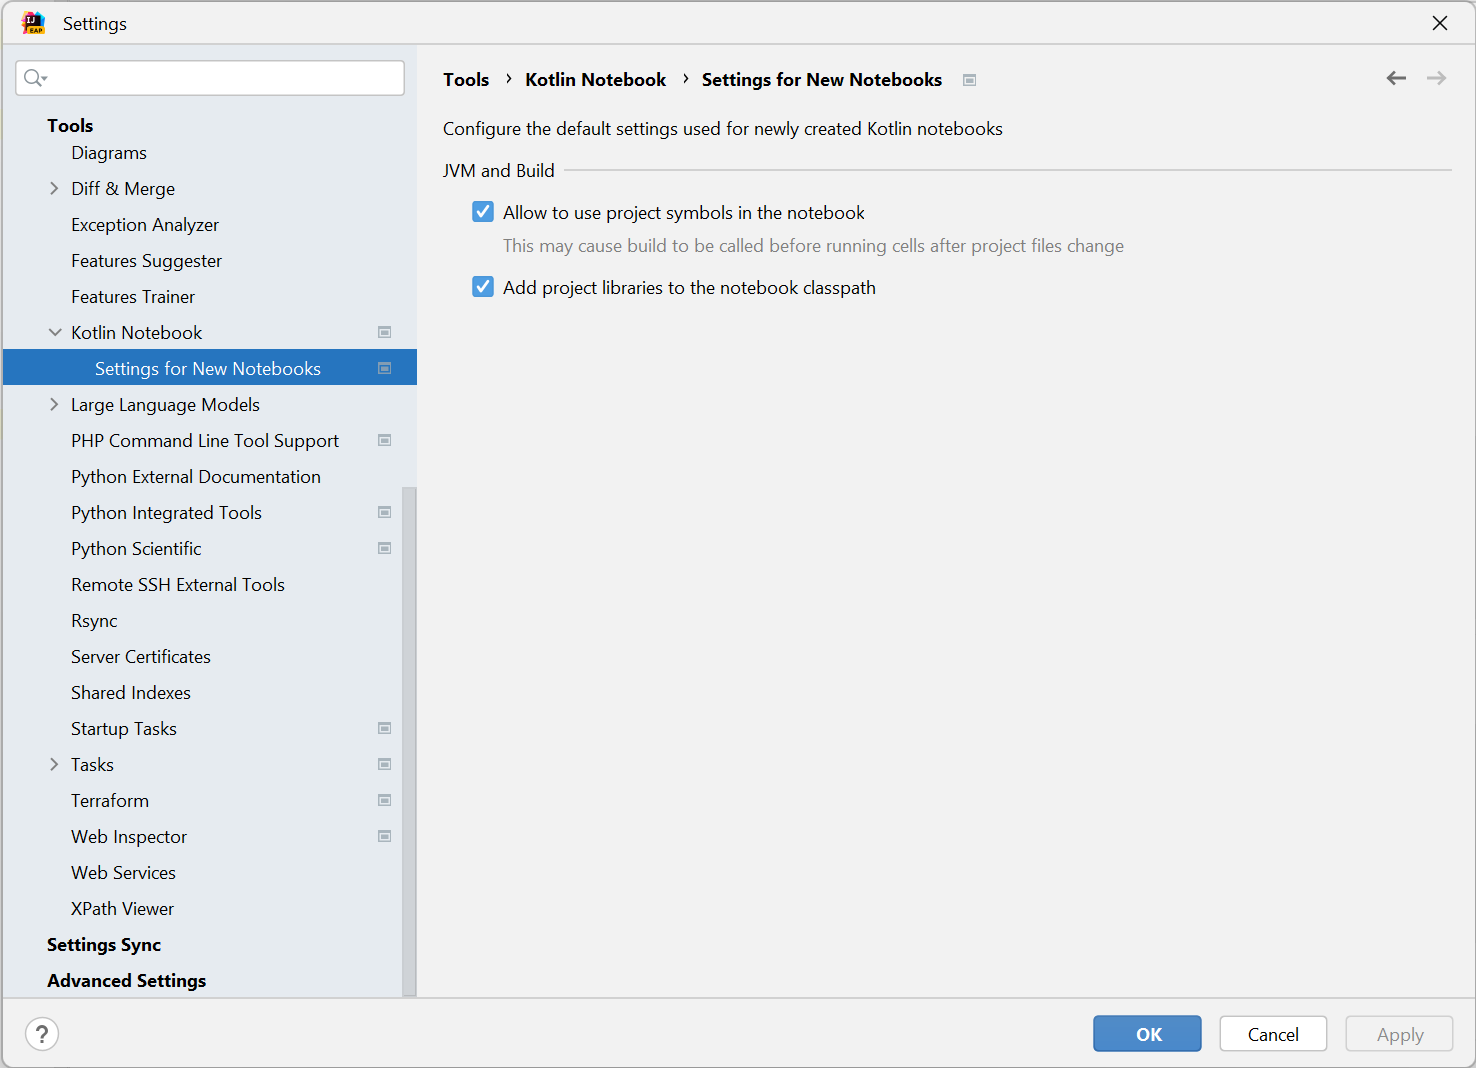

In [18]:
showScreenshot(2)

Of course, you can depend on various JVM libraries even if you don't have a project in the current scope.
The simpliest option we offer is to use predefined library descriptors, you can find which are available using `:help` command or [here](https://github.com/Kotlin/kotlin-jupyter#list-of-supported-libraries).

In [19]:
:help

Kotlin Jupyter kernel.
Kernel version: 0.11.0.381
Kotlin version: 1.8.20
JVM version: 11

Commands:
    :help - display help
    :classpath - show current classpath
    :vars - get visible variables values

Magics:
    %use - injects code for supported libraries: artifact resolution, default imports, initialization code, type renderers
        Usage: %use klaxon(5.5), lets-plot
    %trackClasspath - logs any changes of current classpath. Useful for debugging artifact resolution failures
        Usage: %trackClasspath [on|off]
    %trackExecution - logs pieces of code that are going to be executed. Useful for debugging of libraries support
        Usage: %trackExecution [all|generated|off]
    %useLatestDescriptors - use latest versions of library descriptors available. By default, bundled descriptors are used. Note that default behavior is preferred: latest descriptors versions might be not supported by current version of kernel. So if you care about stability of the notebook, avoid us

Let's try `kotlinx.serialization` library

In [20]:
%use serialization

It allows us to serialize and deserialize classes.

In [21]:
import kotlinx.serialization.Serializable

@Serializable
class User(val firstName: String, val lastName: String)

In [22]:
val bob = User("Alex", "Green")

In [23]:
Json { prettyPrint = true }.encodeToString(bob)

{
    "firstName": "Alex",
    "lastName": "Green"
}

It is possible to specify descriptors' and underlying libraries' versions, write and contribute your own descriptors and much more.
You can read about it [here](https://github.com/Kotlin/kotlin-jupyter/blob/master/docs/libraries.md)

Also, you can add dependencies for any Maven libraries you want

In [24]:
USE {
    repositories {
        // Any additional repositories. Maven central is already included
        // maven("<url>")
    }
    dependencies {
        // Here we add kandy plotting library
        implementation("org.jetbrains.kotlinx:kandy-lets-plot:0.4.3")
    }

    // Sometimes library integration are loaded transitively and you don't want them to do it.
    discardIntegrationTypeNameIf {
        it.startsWith("org.jetbrains.kotlinx.dataframe.")
    }
}

## Renderers and other integration features

Let's try to conduct an experiment: we'll throw 50 dices and count the sum of points on them.
Then, we'll repeat this experiment some reasonable number of times and plot the distribution using kandy library we've just loaded.

In [25]:
import kotlin.random.Random

fun diceNTimesSum(n: Int): Int {
    return (1..n).sumOf { Random.nextInt(1, 7) }
}

val experimentData = (1..100000).map { diceNTimesSum(50) }.groupBy { it }.mapValues { it.value.size }.entries.sortedBy { it.key }
val experimentX = experimentData.map { it.key }
val experimentY = experimentData.map { it.value }

val gaussPlot = plot {
    bars {
        x(experimentX)
        y(experimentY)
    }
}
gaussPlot

120
 
 
 
 
 
 
 
 
 140
 
 
 
 
 
 
 
 
 160
 
 
 
 
 
 
 
 
 180
 
 
 
 
 
 
 
 
 200
 
 
 
 
 
 
 
 
 220
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0
 
 
 
 
 
 
 500
 
 
 
 
 
 
 1,000
 
 
 
 
 
 
 1,500
 
 
 
 
 
 
 2,000
 
 
 
 
 
 
 2,500
 
 
 
 
 
 
 3,000
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y
 
 
 
 
 x

In [26]:
gaussPlot::class

class org.jetbrains.kotlinx.kandy.ir.Plot

As you can see kandy's `Plot` object was rendered to some image. That's because `kandy` library defines a **renderer** for this type of objects. We also can define renderers ourselves.

In [27]:
%use dataframe

In [28]:
val bob = User("Bob", "Brown")
bob

Line_23_jupyter$User@26989de3

`User` isn't a data class, that's why it was rendered this way.

In [29]:
USE {
    // Match is based on runtime type here, beware of type erasure
    render<User> { listOf(it).toDataFrame() }
}

In [30]:
bob

<iframe onload="o_resize_iframe_out_1()" style="width:100%;" class="result_container" id="iframe_out_1" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488704"></table>

<p class="dataframe_description">DataFrame: rowsCount = 1, columnsCount = 2</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for (let i = 0; i

We can also use full syntax for defining renderers. It's verbose but let you do many things

In [31]:
class User2(val name: String)

In [32]:
USE {
    addRenderer(object : RendererHandler {
        override fun replaceVariables(mapping: Map<String, String>): RendererHandler {
            return this
        }

        override val execution: ResultHandlerExecution
            get() = ResultHandlerExecution { host, res ->
                FieldValue("Value of ${res.name} is a user with name ${(res.value as User2).name}", null)
            }

        override fun accepts(value: Any?): Boolean {
            return value != null && value::class == User2::class
        }
    })
}

In [33]:
User2("Felix")

Value of res42 is a user with name Felix

What do the libraries bring except for dependencies and renderers? First of all, default imports.
These imports are implicitly added to all subsequent cells.

In [34]:
fun loadFileFromGitHub(repositoryUrl: String, filePath: String): String {
    val rawUrl = "$repositoryUrl/raw/master/$filePath"
    val url = URL(rawUrl)
    val connection = url.openConnection()
    connection.setRequestProperty("Accept", "application/vnd.github.v3.raw")

    val inputStream = connection.getInputStream()
    val content = inputStream.bufferedReader().use { it.readText() }

    return content
}

fun loadDescriptor(name: String) {
    val text = loadFileFromGitHub("https://github.com/Kotlin/kotlin-jupyter-libraries", "$name.json")
    DISPLAY(MIME(
        "text/markdown" to "```json\n$text```"
    ))
}

Notice `imports` section in the following descriptor:

In [35]:
loadDescriptor("kaliningraph")

```json
{
  "link": "https://github.com/breandan/kaliningraph",
  "description": "Graph library with a DSL for constructing graphs and visualizing the behavior of graph algorithms",
  "dependencies": [
    "com.github.breandan:kaliningraph:0.1.4"
  ],
  "imports": [
    "edu.mcgill.kaliningraph.*",
    "edu.mcgill.kaliningraph.matrix.*",
    "edu.mcgill.kaliningraph.circuits.*",
    "org.ejml.data.*",
    "org.ejml.kotlin.*"
  ],
  "renderers": {
    "edu.mcgill.kaliningraph.LabeledGraph": "HTML(($it as edu.mcgill.kaliningraph.Graph<*, *, *>).html())",
    "edu.mcgill.kaliningraph.circuits.Gate": "HTML(($it as edu.mcgill.kaliningraph.circuits.Gate).graph.html())",
    "edu.mcgill.kaliningraph.circuits.NFunction": "HTML(($it as edu.mcgill.kaliningraph.circuits.NFunction).graph.html())",
    "edu.mcgill.kaliningraph.circuits.ComputationGraph": "HTML(($it as edu.mcgill.kaliningraph.Graph<*, *, *>).html())",
    "edu.mcgill.kaliningraph.matrix.BMat": "HTML(\"<img src=\\\"${($it as edu.mcgill.kaliningraph.matrix.BMat).matToImg()}\\\"/>\")",
    "edu.mcgill.kaliningraph.matrix.BSqMat": "HTML(\"<img src=\\\"${($it as edu.mcgill.kaliningraph.matrix.BSqMat).matToImg()}\\\"/>\")"
  }
}
```

You might have noticed that almost every descriptor in `Kotlin/kotlin-jupyter-libraries` contains link and description.
They are used to build `:help` command output and [our README](https://github.com/Kotlin/kotlin-jupyter#list-of-supported-libraries)

## Creating an integration

So, we learned the concept of the integration. It is a wrapper on top of the usual Kotlin library that simplifies and elevates the experience of using this library in the notebook.
Comprehensive guide to writing library integrations can be found [here](). To inspire you, there is an example of the `dataframe` integration below.

In [36]:
%use dataframe

In [37]:
val df = DataFrame.read("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv")

Let's try to investigate the data that we have just read.

In [38]:
df.petal_length

<iframe onload="o_resize_iframe_out_2()" style="width:100%;" class="result_container" id="iframe_out_2" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488705"></table>

<p class="dataframe_description">... showing only top 20 of 150 rows</p><p class="dataframe_description">DataColumn: name = "petal_length", type = Double, size = 150</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 fo

In [39]:
df.filter { petal_width >= 1.5 && petal_length < 4.5 }

<iframe onload="o_resize_iframe_out_3()" style="width:100%;" class="result_container" id="iframe_out_3" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488706"></table>

<p class="dataframe_description">DataFrame: rowsCount = 1, columnsCount = 5</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[i].children) {
 cols[c].parent = i;
 }
 }
 df.nrow = 0
 for (let i = 0; i

There is also a special variable in the integration to manage display options. For example, we can limit number of displayed rows.

In [40]:
dataFrameConfig.display.rowsLimit = 5

In [41]:
df

<iframe onload="o_resize_iframe_out_4()" style="width:100%;" class="result_container" id="iframe_out_4" frameBorder="0" srcdoc=" <html>
 <head>
 <style type="text/css">
 :root {
 --background: #fff;
 --background-odd: #f5f5f5;
 --background-hover: #d9edfd;
 --header-text-color: #474747;
 --text-color: #848484;
 --text-color-dark: #000;
 --text-color-medium: #737373;
 --text-color-pale: #b3b3b3;
 --inner-border-color: #aaa;
 --bold-border-color: #000;
 --link-color: #296eaa;
 --link-color-pale: #296eaa;
 --link-hover: #1a466c;
}

:root[theme="dark"], :root [data-jp-theme-light="false"], .dataframe_dark{
 --background: #303030;
 --background-odd: #3c3c3c;
 --background-hover: #464646;
 --header-text-color: #dddddd;
 --text-color: #b3b3b3;
 --text-color-dark: #dddddd;
 --text-color-medium: #b2b2b2;
 --text-color-pale: #737373;
 --inner-border-color: #707070;
 --bold-border-color: #777777;
 --link-color: #008dc0;
 --link-color-pale: #97e1fb;
 --link-hover: #00688e;
}

p.dataframe_description {
 color: var(--text-color-dark);
}

table.dataframe {
 font-family: "Helvetica Neue", Helvetica, Arial, sans-serif;
 font-size: 12px;
 background-color: var(--background);
 color: var(--text-color-dark);
 border: none;
 border-collapse: collapse;
}

table.dataframe th, td {
 padding: 6px;
 border: 1px solid transparent;
 text-align: left;
}

table.dataframe th {
 background-color: var(--background);
 color: var(--header-text-color);
}

table.dataframe td {
 vertical-align: top;
}

table.dataframe th.bottomBorder {
 border-bottom-color: var(--bold-border-color);
}

table.dataframe tbody > tr:nth-child(odd) {
 background: var(--background-odd);
}

table.dataframe tbody > tr:nth-child(even) {
 background: var(--background);
}

table.dataframe tbody > tr:hover {
 background: var(--background-hover);
}

table.dataframe a {
 cursor: pointer;
 color: var(--link-color);
 text-decoration: none;
}

table.dataframe tr:hover > td a {
 color: var(--link-color-pale);
}

table.dataframe a:hover {
 color: var(--link-hover);
 text-decoration: underline;
}

table.dataframe img {
 max-width: fit-content;
}

table.dataframe th.complex {
 background-color: var(--background);
 border: 1px solid var(--background);
}

table.dataframe .leftBorder {
 border-left-color: var(--inner-border-color);
}

table.dataframe .rightBorder {
 border-right-color: var(--inner-border-color);
}

table.dataframe .rightAlign {
 text-align: right;
}

table.dataframe .expanderSvg {
 width: 8px;
 height: 8px;
 margin-right: 3px;
}

table.dataframe .expander {
 display: flex;
 align-items: center;
}

/* formatting */

table.dataframe .null {
 color: var(--text-color-pale);
}

table.dataframe .structural {
 color: var(--text-color-medium);
 font-weight: bold;
}

table.dataframe .dataFrameCaption {
 font-weight: bold;
}

table.dataframe .numbers {
 color: var(--text-color-dark);
}

table.dataframe td:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}

table.dataframe tr:hover .formatted .structural, .null {
 color: var(--text-color-dark);
}




:root {
 --scroll-bg: #f5f5f5;
 --scroll-fg: #b3b3b3;
}
:root[theme="dark"], :root [data-jp-theme-light="false"]{
 --scroll-bg: #3c3c3c;
 --scroll-fg: #97e1fb;
}
body {
 scrollbar-color: var(--scroll-fg) var(--scroll-bg);
}
body::-webkit-scrollbar {
 width: 10px; /* Mostly for vertical scrollbars */
 height: 10px; /* Mostly for horizontal scrollbars */
}
body::-webkit-scrollbar-thumb {
 background-color: var(--scroll-fg);
}
body::-webkit-scrollbar-track {
 background-color: var(--scroll-bg);
}
 </style>
 </head>
 <body>
 
<table class="dataframe" id="df_1996488707"></table>

<p class="dataframe_description">... showing only top 5 of 150 rows</p><p class="dataframe_description">DataFrame: rowsCount = 150, columnsCount = 5</p>

 </body>
 <script>
 (function () {
 window.DataFrame = window.DataFrame || new (function () {
 this.addTable = function (df) {
 let cols = df.cols;
 for (let i = 0; i < cols.length; i++) {
 for (let c of cols[

Let's now see what's happening there under the hood. First, we enable debugging logging that will print the code that is executed under the hood.

In [42]:
%trackExecution

Then, we define some other dataframe.

In [43]:
val df1 = dataFrameOf("A", "B", "C")(1, "Str1", null, 2, "Str2", 3)

Executing:
val df1 = dataFrameOf("A", "B", "C")(1, "Str1", null, 2, "Str2", 3)

Executing:
@DataSchema
interface _DataFrameType1

val ColumnsContainer<_DataFrameType1>.A: DataColumn<Int> @JvmName("_DataFrameType1_A") get() = this["A"] as DataColumn<Int>
val DataRow<_DataFrameType1>.A: Int @JvmName("_DataFrameType1_A") get() = this["A"] as Int
val ColumnsContainer<_DataFrameType1?>.A: DataColumn<Int?> @JvmName("Nullable_DataFrameType1_A") get() = this["A"] as DataColumn<Int?>
val DataRow<_DataFrameType1?>.A: Int? @JvmName("Nullable_DataFrameType1_A") get() = this["A"] as Int?
val ColumnsContainer<_DataFrameType1>.B: DataColumn<String> @JvmName("_DataFrameType1_B") get() = this["B"] as DataColumn<String>
val DataRow<_DataFrameType1>.B: String @JvmName("_DataFrameType1_B") get() = this["B"] as String
val ColumnsContainer<_DataFrameType1?>.B: DataColumn<String?> @JvmName("Nullable_DataFrameType1_B") get() = this["B"] as DataColumn<String?>
val DataRow<_DataFrameType1?>.B: String? @JvmName(

As you can see, a marker interface `_DataFrameType1` is created and property accessors are generated for it. Let's check what's the type of `df1` now:

In [44]:
::df1

Executing:
::df1



val Line_55_jupyter.df1: org.jetbrains.kotlinx.dataframe.DataFrame<Line_54_jupyter._DataFrameType1>

So, `df1` now is not simply a `DataFrame<*>`, it's `DataFrame<_DataFrameType1>`. That's exactly what allows us to statically resolve defined property accessors on it.

In [45]:
%trackExecution off

API that DataFrame uses to achieve all of these is open, and you can try it yourself! The code of the integration is available [here](https://github.com/Kotlin/dataframe/blob/master/core/src/main/kotlin/org/jetbrains/kotlinx/dataframe/jupyter/Integration.kt)

## Inter-cell API

To use Kotlin Notebook API you don't necessarily need to create a separate file with integration. As it was shown above, you can place in `USE { }` call the same integration that you would
place in the standalone library or JSON descriptor. However, notebook offers API to get some information about the current notebook session and to set it up.

The main entry point is `notebook`: it allows you to investigate what cells were already executed, what libraries were loaded, what renderers and variable processors are loaded and gives the ability to unload them.
Read the documentation of the `Notebook` interface for reliable and actual information about this API

In [46]:
notebook.cellsList.take(5).map { "> " + it.code }.joinToString("\n")

> 2 + 2

> val result = 3 * 14

> result

> (Out[3] as Int) / 2

> val a1: Int = 1
val a2: Int? = 2
val a3: Int? = null


In [47]:
notebook.kernelVersion

0.11.0.381

In [48]:
notebook.cellVariables

{0=[], 1=[result], 2=[result], 3=[result], 4=[a1, a3, result], -1=[___a2, a2, kandyConfig, dataFrameConfig, df, df1, height, width], 5=[result, a1, a2], 7=[result, a1, a2], 9=[result, a1, a2], 10=[kotlinMascot, result, a1, a2], 11=[result, a1, a2], 12=[result, a1, a2], 13=[graphics, height, image, width, result, a1, a2], 14=[result, a1, a2, height, width], 15=[a1, a2, height, width], 16=[a1, a2, height, width], 17=[a1, a2, height, width], 20=[a2, height, width], 21=[height, width], 22=[height, width], 23=[height, width], 24=[experimentData, experimentX, experimentY, gaussPlot, height, width], 25=[height, width], 27=[bob, height, width], 28=[height, width], 29=[height, width], 30=[height, width], 31=[height, width], 32=[height, width], 33=[height, width], 34=[height, width], 36=[height, width], 37=[height, width], 38=[height, width], 39=[height, width], 40=[height, width], 42=[height, width], 43=[height, width], 45=[height, width], 46=[height, width], 47=[height, width]}

Also, a couple of options is available with `SessionOptions` object.

In [49]:
SessionOptions.resolveSources // could be switched off to speed up dependencies loading process

true

In [50]:
SessionOptions.resolveMpp // could be switched on to resolve MPP libraries such as kotlinx-serialization from "universal" Maven coordinates

false

## Sharing the notebooks

Essentially, Kotlin notebooks are Jupyter notebooks. It means they could be opened, edited and run with any Jupyter client such as [Jupyter Notebook](https://jupyter.org/),
[Jupyter Lab](https://jupyterlab.readthedocs.io/en/latest/) and [Datalore](https://www.jetbrains.com/datalore/). [We plan](https://youtrack.jetbrains.com/issue/KTNB-291/Datalore-Share-action) to integrate with Datalore better in the future.
The only limitation is that project dependencies will be not included into the notebook in other clients. However, you can build the logic based on Jupyter client type:

In [51]:
if (notebook.jupyterClientType != JupyterClientType.KOTLIN_NOTEBOOK) {
    // load substitutive dependencies
}

Notebooks could be also loaded and viewed on GitHub (including gists). Limitation there is that JS isn't executed in the outputs.
To overcome it in `kandy`, we [add extra SVG output that is hidden from JS](https://github.com/Kotlin/kandy/blob/main/kandy-lets-plot/src/main/kotlin/org/jetbrains/kotlinx/kandy/letsplot/util/rendering.kt#L46).

Kotlin Notebooks could be also converted to some other format using [nbconvert tool](https://nbconvert.readthedocs.io/en/latest/).

## What's next?

Kotlin Notebook project is experimental and actively developed. Use the latest version of plugin to be in sync.
We eagerly need your stories and feedback: share them in the dedicated [#notebooks](https://kotlinlang.slack.com/archives/C05333T208Y) Slack channel or in our [issue tracker](https://youtrack.jetbrains.com/issues/KTNB).

See you in the next cell!